## 사용자 행동 인식 데이터셋

- 손목 스마트폰 센서를 통해 수집된 일상의 동작 데이터를 통해 6가지 Activity로 예측

- [캐글](https://www.kaggle.com)의 [Human Activity Recognition with Smartphones](https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones)에서 `train.csv`와 `test.csv`를 다운로드
- 두 파일을 각각 `human_activity_train.csv`와 `human_activity_train.csv`로 datasets 디렉토리에 저장

### 1. 데이터 탐색

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
train = pd.read_csv('datasets/human_activity_train.csv')
test = pd.read_csv('datasets/human_activity_test.csv')

In [11]:
train.info() # 7352개의 샘플 563개의 컬럼

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [12]:
train.isnull().sum().sum() #열이 많아서 sum두번 했음 널값은 없음

0

In [13]:
train.shape

(7352, 563)

In [14]:
test.shape

(2947, 563)

In [15]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [16]:
train['Activity'].value_counts() #타겟이다. 다중 분류 모델로 가야할 듯.

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [17]:
import seaborn as sns

<AxesSubplot:xlabel='Activity', ylabel='count'>

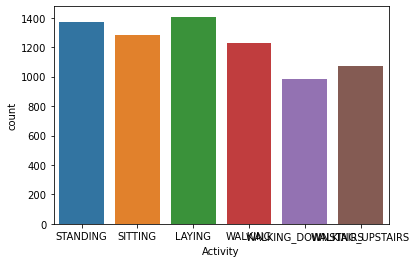

In [18]:
sns.countplot(x = train['Activity'])

In [19]:
train['subject'].value_counts() #자원봉사자 id?

25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64

In [20]:
train.describe() #sub까지는 수치 데이터 마지막 563번째의 activity만 카테고리 데이터

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [21]:
from sklearn.preprocessing import OrdinalEncoder #01234 처럼 수로 치환 원핫인코딩은 컬럼 많아지는 경우 때문에 정답값으로 쓰기 애매함.
#잘 안되면 one hot으로 바꾸면 된다.

In [22]:
label_encoder = OrdinalEncoder()

train['Activity']= label_encoder.fit_transform(train['Activity'].values.reshape(-1, 1))
train['Activity']

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
7347    5.0
7348    5.0
7349    5.0
7350    5.0
7351    5.0
Name: Activity, Length: 7352, dtype: float64

In [23]:
label_encoder.categories_

[array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
        'WALKING_UPSTAIRS'], dtype=object)]

In [24]:
test.shape

(2947, 563)

In [25]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [26]:
label_encoder = OrdinalEncoder()
test['Activity'] = label_encoder.fit_transform(test['Activity'].values.reshape(-1, 1))

In [27]:
X_train = train.drop(['subject', 'Activity'], axis= 1)
y_train = train['Activity']

X_test = test.drop(['subject', 'Activity'], axis= 1)
y_test = test['Activity']

In [28]:
X_train.shape

(7352, 561)

In [29]:
y_train.shape

(7352,)

In [30]:
X_test.shape

(2947, 561)

In [31]:
y_test.shape

(2947,)

* 모델 훈련

### LogisticRegression

### 파라미터 제공 'c':np.arange(10 ,61, 10), 'penalty' : ['l2', 'l1']

### Decisiontree

### : max_depth, max_features, min_samples_split, 시각화

### RandomForestClassfier 

### : n_estimators, max_features, max_depth, 특성 중요도

bootstrap(중복여부) 등등 해보는 것 추천

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.model import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scare = StandardScaler()

In [ ]:
X_train_scared = std_scare(X_train)

In [42]:
np.arange(10, 61, 10)

array([10, 20, 30, 40, 50, 60])

In [74]:
# 선형회귀 (LinearRegression : 수학적인 공식, SGDRegressor : 경사하강법)

LogistricRegression() 경사하강 처럼 적정 값에서 멈추는게 아니라 디폴트 100정도보다 10000번 해야해서 시간이 오래걸린다.

In [73]:
for penalty in ['l1', 'l2']:
    for c in np.arange(10, 61, 10):
        log_reg = LogisticRegression(penalty=penalty, C=c, solver='saga', max_iter=8000, random_state=42)
        log_reg.fit(X_train, y_train)
        log_red_pred = log_reg.predict(X_test)
        print('패널티는 :',penalty, '규제는 :', c, '\n결과',accuracy_score(y_test, log_red_pred))

패널티는 : l1 규제는 : 10 
결과 0.9613165931455717
패널티는 : l1 규제는 : 20 
결과 0.9609772650152698
패널티는 : l1 규제는 : 30 
결과 0.9619952494061758
패널티는 : l1 규제는 : 40 
결과 0.9619952494061758
패널티는 : l1 규제는 : 50 
결과 0.9619952494061758
패널티는 : l1 규제는 : 60 
결과 0.9626739056667798
패널티는 : l2 규제는 : 10 
결과 0.9616559212758737
패널티는 : l2 규제는 : 20 
결과 0.9613165931455717
패널티는 : l2 규제는 : 30 
결과 0.9606379368849678
패널티는 : l2 규제는 : 40 
결과 0.9602986087546658
패널티는 : l2 규제는 : 50 
결과 0.9602986087546658
패널티는 : l2 규제는 : 60 
결과 0.9609772650152698


패널티는 : l1 규제는 : 10 

결과 0.9613165931455717

패널티는 : l1 규제는 : 20 

결과 0.9609772650152698

패널티는 : l1 규제는 : 30 

결과 0.9619952494061758

패널티는 : l1 규제는 : 40 

결과 0.9619952494061758

In [ ]:
log_clf = LogisticRegression()

In [ ]:
y_scores_lr = cross_val_score(log_clf, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)

In [ ]:
y_scores_lr.mean()

In [ ]:
param_grid = [
    {'c' : [10, 20]}
] #추가해볼만한 Parameter가 있으면 고려해보기.

grid_search = GridSearchCV(log_clf, scoring='accuracy', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_score_

# 소프트맥스

In [ ]:
soft_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)

In [ ]:
y_scores_soft = cross_val_score(soft_clf, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)

In [ ]:
y_scores_soft.mean()

### DecisionTreeClassfier : max_depth, max_features, min_samples_split, 시각화

In [34]:
tree_clf = DecisionTreeClassifier(max_depth=9, max_features=15, min_samples_split=13, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, max_features=15, min_samples_split=13,
                       random_state=42)

In [ ]:
y_scores_tree = cross_val_score(tree_clf, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)

In [ ]:
y_scores_tree.mean()

In [ ]:
param_grid = [
    {'max_depth' : [1, 3, 5 ,7, 9],
    'max_features' : ['sqrt', None],
    'min_samples_split' : [7, 9, 11, 13, 15]}
] #추가해볼만한 Parameter가 있으면 고려해보기.

grid_search = GridSearchCV(tree_clf, scoring='accuracy', cv=5, n_jobs=-1, param_gird=param_grid)

grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [35]:
tree_pred = tree_clf.predict(X_test)

In [36]:
accuracy_score(y_test, tree_pred)

0.8540889039701391

In [37]:
rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=16, n_jobs=-1, random_state=42, bootstrap=True)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=1000, n_jobs=-1,
                       random_state=42)

In [38]:
rnd_pred = rnd_clf.predict(X_test)

In [39]:
accuracy_score(y_test, rnd_pred)

0.8870037326094333

In [55]:
tree_importance = tree_clf.feature_importances_

In [61]:
import pandas as pd

In [64]:
imp_series = pd.Series(tree_importance, index=test.columns[:-2])

In [70]:
imp_series = imp_series[imp_series.values!=0]

In [72]:
imp_series

tBodyAcc-mad()-X                   0.000880
tBodyAcc-mad()-Y                   0.000339
tBodyAcc-energy()-X                0.000568
tBodyAcc-correlation()-X,Z         0.007584
tGravityAcc-mean()-X               0.250115
                                     ...   
fBodyBodyGyroJerkMag-mad()         0.001810
fBodyBodyGyroJerkMag-sma()         0.001570
fBodyBodyGyroJerkMag-kurtosis()    0.000177
angle(Y,gravityMean)               0.009835
angle(Z,gravityMean)               0.004477
Length: 92, dtype: float64

In [ ]:
bag_clf = BaggingClassifier(
                DecisionTreeClassifier(random_state=42, max_leaf_nodes=16, max_depth=9, max_features=15, min_samples_split=13, random_state=42), n_estimators=500,
                random_state=42 ,max_samples=100, oob_score=True, n_jobs=-1, bootstrap=True
)

bag_clf.fit(X_train, y_train)

In [ ]:
# DecisionTreeClassfier : max_depth, max_features, min_samples_split, 시각화

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
export_graphviz(tree_clf,
               out_file='tree.dot',
               feature_names= X_train.columns,
               rounded= True,
               filled= True)

In [ ]:
import graphviz
with open('tree.dot', encoding='UTF-8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
y_scores_tree = cross_val_score(forest_clf, X_train, y_train, ) #RandomForestClassfier : n_estimators, max_features, max_depth, 특성 중요도

In [ ]:
param_grid = [
    {'max_depth' : [1, 3, 5 ,7, 9],
    'max_features' : ['sqrt', None]}
] #추가해볼만한 Parameter가 있으면 고려해보기.

grid_search = GridSearchCV(tree_clf, scoring='accuracy', cv=5, n_jobs=-1, param_gird=param_grid)

grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_